D A Santhosh






#Netflix Analysis

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('netflix.csv')
df.shape

(8807, 12)

#Information of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

First five rows

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
movies_df = df[df['type'] == 'Movie']

In [ ]:
release_years = movies_df['release_year']

In [ ]:
year = df['release_year']

Number of movies released per year

In [ ]:
movies_per_year = release_years.value_counts().sort_index()
movies_per_year

1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: release_year, Length: 73, dtype: int64

#How has the number of movies released per year changed over the last 20-30 years?

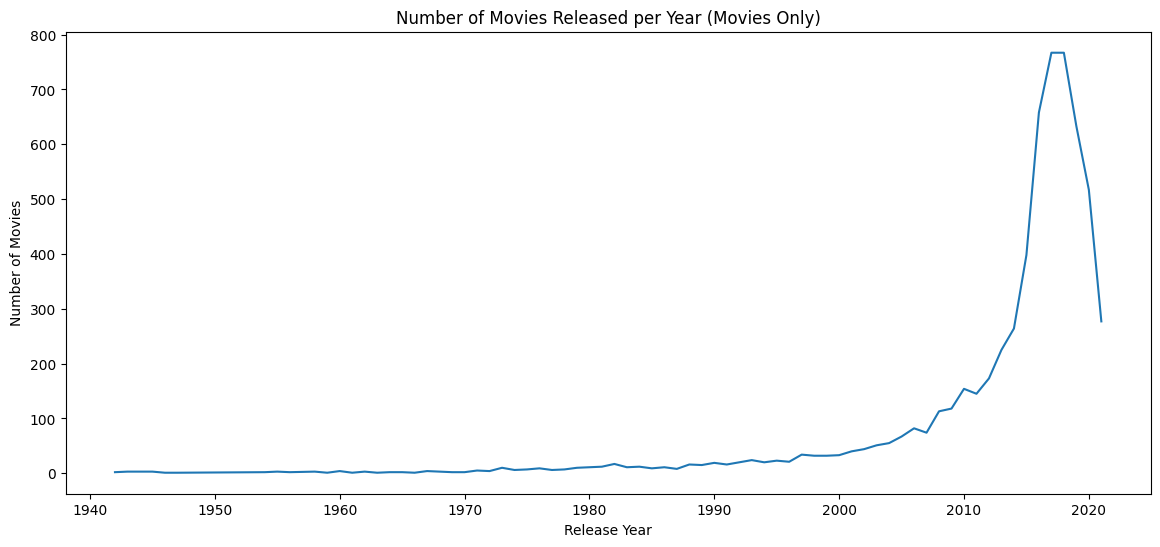

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(movies_per_year.index, movies_per_year.values)
plt.title('Number of Movies Released per Year (Movies Only)')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.show()

#Insights found

There is a gradual increase in the number of movies in the last 20 to 30 years ,
there has been a rapid increase especially over the years 2000 , 2010 till around 2019 and has had a drastic fall in the number of releases after 2020

Comparison of tv shows vs. movies.

In [ ]:
tv_shows_df = df[df['type'] == 'TV Show']

Count of number of Movies vs TV shows

In [ ]:
type_counts = df['type'].value_counts()
type_counts

Movie      6131
TV Show    2676
Name: type, dtype: int64

Comparision of TV shows and Movies on Netflix

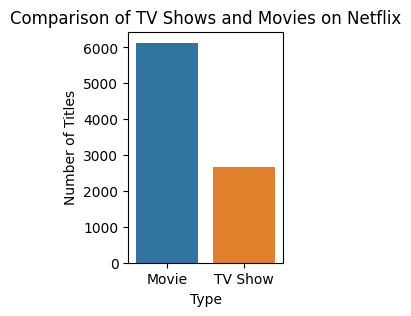

In [ ]:
plt.figure(figsize= (2,3))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.title('Comparison of TV Shows and Movies on Netflix')
plt.xlabel('Type')
plt.ylabel('Number of Titles')
plt.show()

#Insights found

The number of movies available in netflix is higher than the number of TV Shows in a comparision between the two

#What is the best time to launch a TV show?

In [ ]:
# Extracting the 'date_added' column from the DataFrame
date_added = pd.to_datetime(tv_shows_df['date_added'], errors='coerce')

In [ ]:
# Extracting the month from the 'date_added' column
tv_shows_df['Month_added'] = date_added.dt.month_name()

<ipython-input-20-f68e1b7143ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_df['Month_added'] = date_added.dt.month_name()


Counting the number of TV shows added per month

In [ ]:
tv_shows_by_month = tv_shows_df['Month_added'].value_counts()
tv_shows_by_month

December     266
July         262
September    251
August       236
June         236
October      215
April        214
March        213
November     207
May          193
January      192
February     181
Name: Month_added, dtype: int64

Ordering the months by calendar order

In [ ]:
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tv_shows_by_month = tv_shows_by_month.reindex(months_order)
tv_shows_by_month

January      192
February     181
March        213
April        214
May          193
June         236
July         262
August       236
September    251
October      215
November     207
December     266
Name: Month_added, dtype: int64

Plotting the data

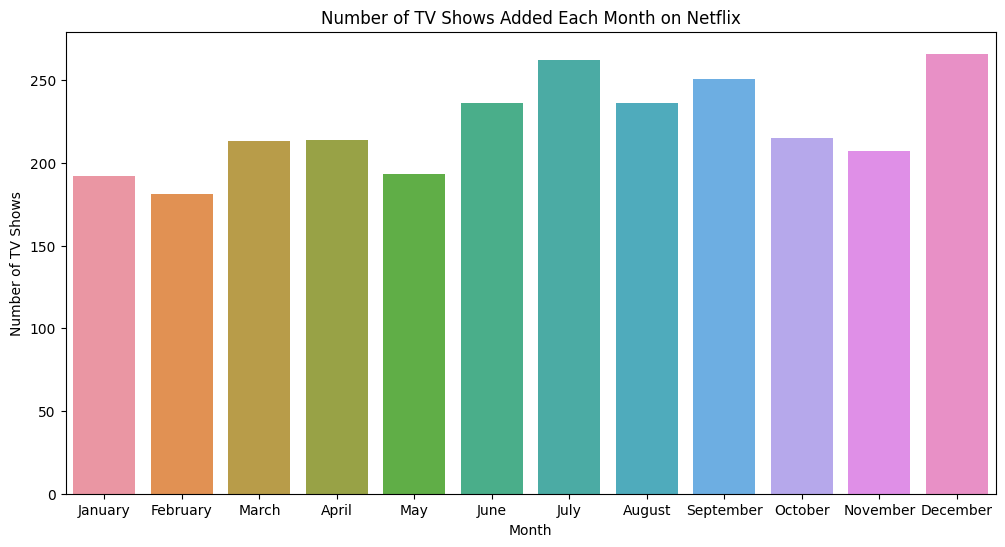

In [ ]:

plt.figure(figsize=(12, 6))
sns.barplot(x=tv_shows_by_month.index, y=tv_shows_by_month.values)
plt.title('Number of TV Shows Added Each Month on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.show()

#Insights

The best time to release a TV show would be around December according to me since most of the students and working proffessional would be having a holiday and loads of time to discover and watch new content , or even during other parts of the month which have festive seasons

#Analysis of actors/directors of different types of shows/movies

Number of missing Cast/Actors

In [ ]:

missing_cast = df['cast'].isnull().sum()
missing_cast

825

Number of missing directors

In [ ]:
missing_director = df['director'].isnull().sum()
missing_director

2634

In [ ]:
# Split the 'actors' and 'directors' columns into lists
df['cast_list'] = df['cast'].str.split(', ')
df['director_list'] = df['director'].str.split(', ')

Count the occurrences of each actor and director

In [ ]:

cast_counts = pd.Series([cast for sublist in df['cast_list'].dropna() for cast in sublist]).value_counts()
cast_counts

Anupam Kher                43
Shah Rukh Khan             35
Julie Tejwani              33
Naseeruddin Shah           32
Takahiro Sakurai           32
                           ..
Maryam Zaree                1
Melanie Straub              1
Gabriela Maria Schmeide     1
Helena Zengel               1
Chittaranjan Tripathy       1
Length: 36439, dtype: int64

In [ ]:
director_counts = pd.Series([director for sublist in df['director_list'].dropna() for director in sublist]).value_counts()
director_counts

Rajiv Chilaka     22
Jan Suter         21
Raúl Campos       19
Suhas Kadav       16
Marcus Raboy      16
                  ..
Raymie Muzquiz     1
Stu Livingston     1
Joe Menendez       1
Eric Bross         1
Mozez Singh        1
Length: 4993, dtype: int64

Top 10 actors and directors

In [ ]:
top_cast = cast_counts.head(10)
top_cast


Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
dtype: int64

In [ ]:
top_director = director_counts.head(10)
top_director

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
dtype: int64

Plotting the Graph

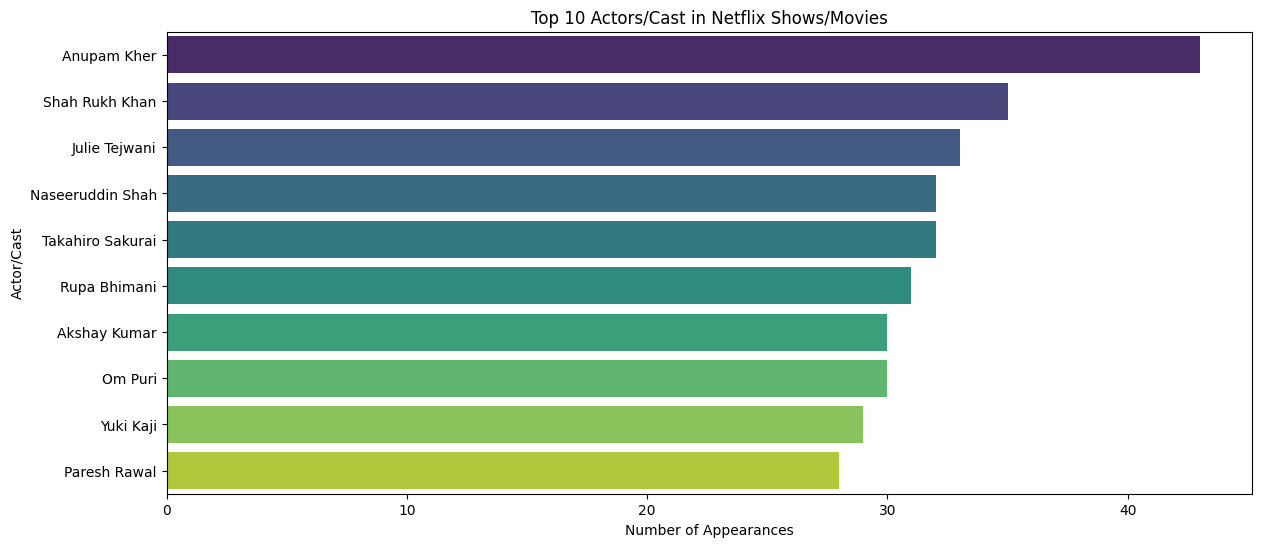

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=top_cast.values, y=top_cast.index, palette='viridis')
plt.title('Top 10 Actors/Cast in Netflix Shows/Movies')
plt.xlabel('Number of Appearances')
plt.ylabel('Actor/Cast')
plt.show()


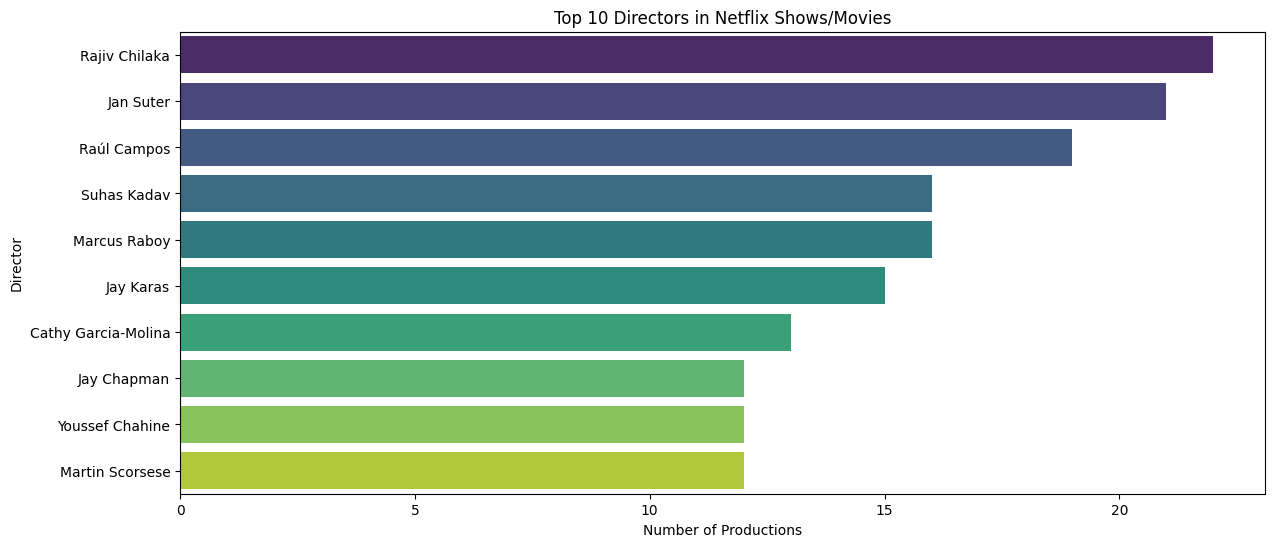

In [ ]:
plt.figure(figsize=(14, 6))
sns.barplot(x=top_director.values, y=top_director.index, palette='viridis')
plt.title('Top 10 Directors in Netflix Shows/Movies')
plt.xlabel('Number of Productions')
plt.ylabel('Director')
plt.show()

Does Netflix has more focus on TV Shows than movies in recent years

In [ ]:
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

Count the number of TV shows

In [ ]:
tv_shows_counts = tv_shows['release_year'].value_counts().sort_index()
tv_shows_counts


1925      1
1945      1
1946      1
1963      1
1967      1
1972      1
1974      1
1977      1
1979      1
1981      1
1985      1
1986      2
1988      2
1989      1
1990      3
1991      1
1992      3
1993      4
1994      2
1995      2
1996      3
1997      4
1998      4
1999      7
2000      4
2001      5
2002      7
2003     10
2004      9
2005     13
2006     14
2007     14
2008     23
2009     34
2010     40
2011     40
2012     64
2013     63
2014     88
2015    162
2016    244
2017    265
2018    380
2019    397
2020    436
2021    315
Name: release_year, dtype: int64

Count the number of movies

In [ ]:
movies_counts = movies['release_year'].value_counts().sort_index()
movies_counts

1942      2
1943      3
1944      3
1945      3
1946      1
       ... 
2017    767
2018    767
2019    633
2020    517
2021    277
Name: release_year, Length: 73, dtype: int64

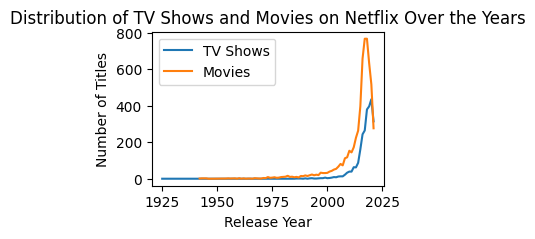

In [ ]:
plt.figure(figsize=(3,2))
sns.lineplot(x=tv_shows_counts.index, y=tv_shows_counts.values, label='TV Shows')
sns.lineplot(x=movies_counts.index, y=movies_counts.values, label='Movies')
plt.title('Distribution of TV Shows and Movies on Netflix Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.show()

#Insights

No netflix does not have more focus on TV Shows than Movies , as it is clearly shown in the graph the number of movies released is more than the number of TV Shows , it all falls down to the viewership at the end of the day, in this busy lifestyle people in general prefer watching more number of movies with family and during the weekends as the duration is less and are able to consume information in a short span of time , this also is profitable as this way more number of people are reached , where as TV shows are for people who can take time every day and watching long hours to consume the content

#Understanding what content is available in different countries

Counting the number of titles in each country

In [ ]:
country_counts = df['country'].value_counts()
country_counts

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

Top 10 Countries with most content

In [ ]:
top_countries = country_counts.head(10)
top_countries

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

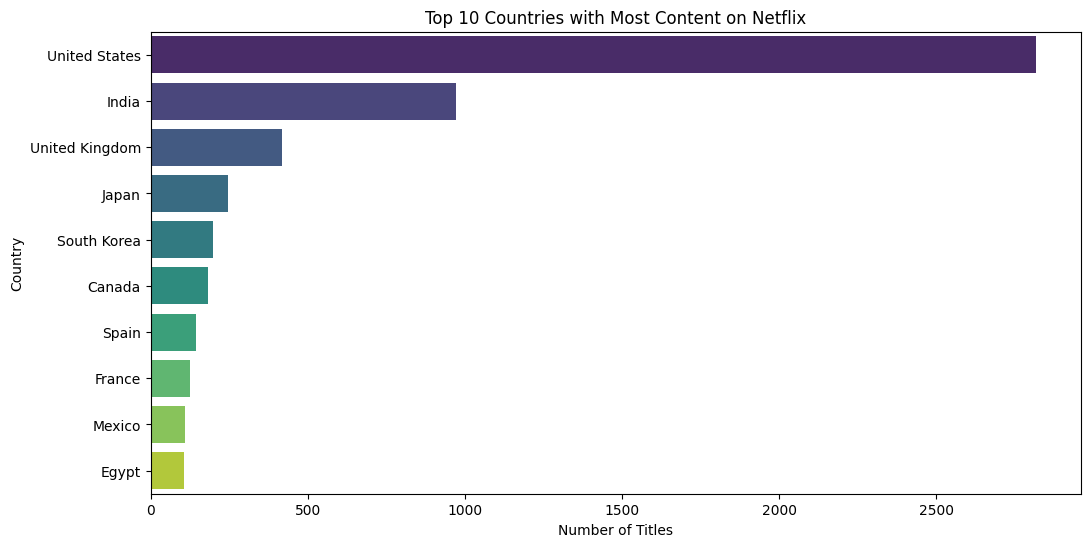

In [ ]:
# Plotting the distribution of content across countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries with Most Content on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

#What type of content is available in different countries?

In [ ]:
cross_tab = pd.crosstab(df['country'], df['type'])

In [ ]:
# Selecting the top N countries and content types for better visualization
top_countries = cross_tab.sum(axis=1).nlargest(10).index
top_content_types = cross_tab.sum().nlargest(2).index

In [ ]:
# Filtering the cross-tabulation for the selected countries and content types
filtered_cross_tab = cross_tab.loc[top_countries, top_content_types]

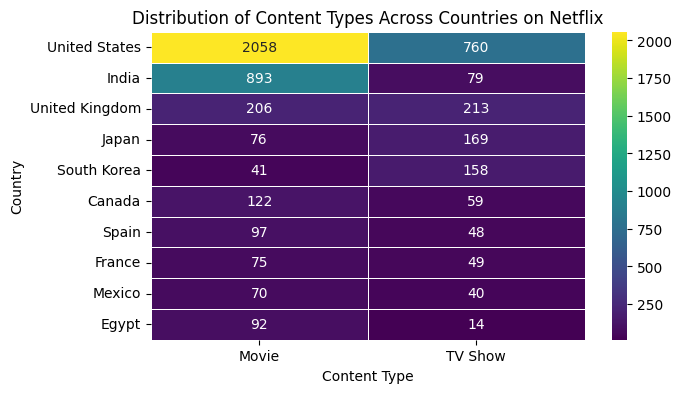

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(filtered_cross_tab, cmap='viridis', annot=True, fmt='d', linewidths=.5)
plt.title('Distribution of Content Types Across Countries on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Country')
plt.show()

#Insights

The content available in most countried including  US, India , Canada, Spain, France etc is movies which is more in number than compared to TV shows , where as countries like United Kingdom , Japan , South Korea ets produce a huge number of TV shows than movies , this shows that the TV shows from these countries have had a better fan base than the countries in a whole with respect the content